# Part A. 
Hoaglin, Mosteller, and Tukey present data on blood levels of beta-endorphin as a function of stress. They took beta-endorphin levels for 19 patients 12 hours before surgery and again 10 minutes before surgery. The data are presented below, in fmol/ml:


<img src="pr21.jpg" width="300"/>

- Based on these data, what can you conclude? What effect does increased stress have on beta-endorphin levels?
- Create a scatterplot of the data, and compute the correlation between the two sets of scores. What does this say that is relevant to the answer to this project?
- We always need to look closely at our data. Sometimes we find things that are hard to explain. Look closely at the data; what attracts your attention?
- Construct 95% confidence limits on the true mean difference between two levels at the two times described above.
- Compute a measure of effect size for the data, and tell what this measure indicates.
- Assume that the mean and the standard deviation of the difference scores would remain the same if we added more subjects. How many subjects would we need to obtain a $t$ that is significant at $\alpha=0.01$ (two-tailed)? (The difference was significant at $\alpha=0.05$, but not at $\alpha=0.01$.) 
- Modify the data by shifting the entries in the “12-hour” column so as to increase the relationship between the two variables. Run a $t$ test on the modified data and notice the effect on $t$. (You could never do this with real data, because paired scores must be kept together, but doing so here reveals the important role played by the relationship between variables.)
- Using your answer to the previous part and your knowledge of correlation, how would you expect the degree of correlation between two variables (data sets) to affect the magnitude of the $t$ test between them?

In [2]:
library(rstatix)
library(ggpubr)
library(dplyr)

In [3]:
Stress_Endo = data.frame(
    TwelveHours = c(10.0,6.5,8.0,12.0,5.0,11.5,5.0,3.5,7.5,5.8,4.7,8.0,7.0,17.0,8.8,17.0,15.0,4.4,2.0),
    TenMinutes = c(6.5,14.0,13.5,18.0,14.5,9.0,18.0,42.0,7.5,6.0,25.0,12.0,52.0,20.0,16.0,15.0,11.5,2.5,2.0))

In [4]:
Stress_Endo

TwelveHours,TenMinutes
<dbl>,<dbl>
10.0,6.5
6.5,14.0
8.0,13.5
12.0,18.0
5.0,14.5
11.5,9.0
5.0,18.0
3.5,42.0
7.5,7.5


In [5]:
Stress_long = gather(Stress_Endo, key = "Measure", value = "Level", TwelveHours, TenMinutes)

In [6]:
Stress_long = Stress_long %>% mutate(ID = row_number())

In [7]:
Stress_long

Measure,Level,ID
<chr>,<dbl>,<int>
TwelveHours,10.0,1
TwelveHours,6.5,2
TwelveHours,8.0,3
TwelveHours,12.0,4
TwelveHours,5.0,5
TwelveHours,11.5,6
TwelveHours,5.0,7
TwelveHours,3.5,8
TwelveHours,7.5,9


## 1. Based on these data, what can you conclude? What effect does increased stress have on beta-endorphin levels?


In [8]:
Stress_long %>% group_by(Measure) %>% get_summary_stats(Level)

Measure,variable,n,min,max,median,q1,q3,iqr,mad,mean,sd,se,ci
<chr>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
TenMinutes,Level,19,2,52,14.0,8.25,18.00,9.75,7.413,16.053,12.509,2.870,6.029
TwelveHours,Level,19,2,17,7.5,5.00,10.75,5.75,3.706,8.353,4.397,1.009,2.119


# Answer:
#### its apparent that the more the situation is stressful, like 10min before surgery, the betaendorphin levels increase, which would indicate that stress level can be related to, if not predict, betaendorphin level, or vise versa, the higher the level betaendorphin, the higher might be the stress level of patients.

## 2. Create a scatterplot of the data, and compute the correlation between the two sets of scores. What does this say that is relevant to the answer to this project?

In [253]:
endo_lm = lm(TwelveHours~TenMinutes, data = Stress_Endo)

In [254]:
summary(endo_lm)


Call:
lm(formula = TwelveHours ~ TenMinutes, data = Stress_Endo)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.6655 -3.3482 -0.5523  2.2125  8.7352 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  8.71001    1.71412   5.081 9.25e-05 ***
TenMinutes  -0.02226    0.08508  -0.262    0.797    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 4.515 on 17 degrees of freedom
Multiple R-squared:  0.004012,	Adjusted R-squared:  -0.05458 
F-statistic: 0.06847 on 1 and 17 DF,  p-value: 0.7967


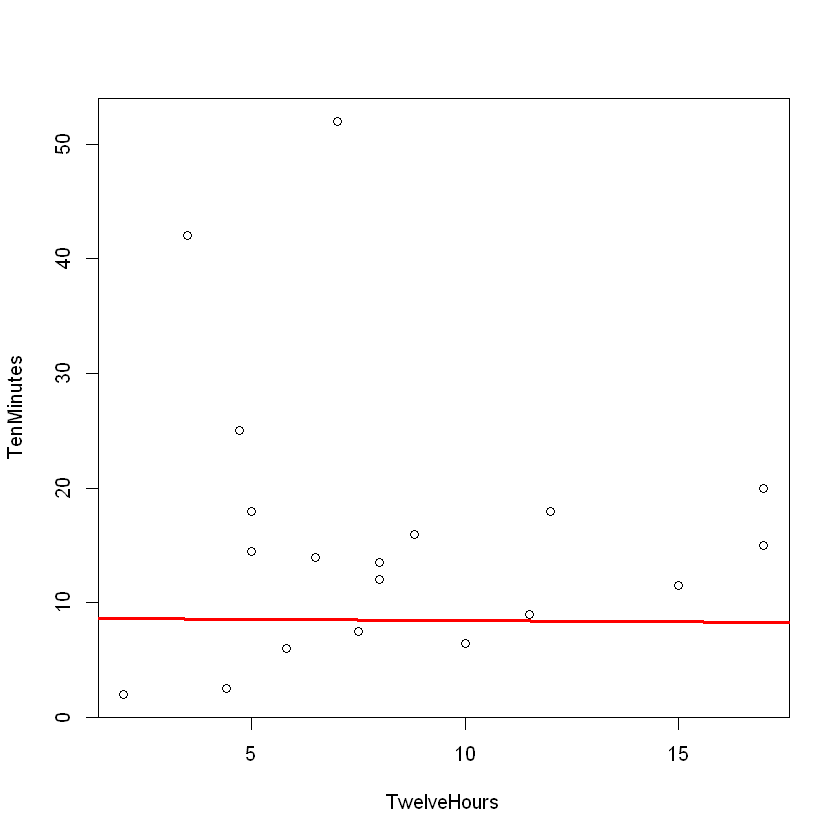

In [43]:
plot(Stress_Endo)
abline(endo_lm, lwd = 3, col = "red")

## The Correlation report shows that there is no linear relation between two sets of data, plus, correlation lines drawn on the scatter plot shows the same, A value is almost zero.

## 3. We always need to look closely at our data. Sometimes we find things that are hard to explain. Look closely at the data; what attracts your attention?

#### Answer: its odd that some of the data shows  that the beta endorphin level actually is lower 10 mins before surgery, which is against the assumption of the project.

## 4. Construct 95% confidence limits on the true mean difference between two levels at the two times described above.

In [14]:
wilcox.test(Stress_Endo$TwelveHours, Stress_Endo$TenMinutes, paired = TRUE, alternative = "two.sided", conf.int = TRUE)

Warning message in wilcox.test.default(Stress_Endo$TwelveHours, Stress_Endo$TenMinutes, :
"cannot compute exact p-value with ties"
Warning message in wilcox.test.default(Stress_Endo$TwelveHours, Stress_Endo$TenMinutes, :
"cannot compute exact confidence interval with ties"
Warning message in wilcox.test.default(Stress_Endo$TwelveHours, Stress_Endo$TenMinutes, :
"cannot compute exact p-value with zeroes"
Warning message in wilcox.test.default(Stress_Endo$TwelveHours, Stress_Endo$TenMinutes, :
"cannot compute exact confidence interval with zeroes"



	Wilcoxon signed rank test with continuity correction

data:  Stress_Endo$TwelveHours and Stress_Endo$TenMinutes
V = 22, p-value = 0.01057
alternative hypothesis: true location shift is not equal to 0
95 percent confidence interval:
 -16.649930  -1.250057
sample estimates:
(pseudo)median 
     -5.500086 


## Answer: 
#### since the data is not normally distributed here I used wilcoxon test to extract 95% confidence interval.

# 5. Compute a measure of effect size for the data, and tell what this measure indicates

In [292]:
Stress_long %>% group_by(Measure) %>% shapiro_test(Level)

Measure,variable,statistic,p
<chr>,<chr>,<dbl>,<dbl>
TenMinutes,Level,0.8166532,0.002015472
TwelveHours,Level,0.9204097,0.115159639


In [269]:
Stress_Endo = Stress_Endo[-8, ]

In [270]:
Stress_Endo = Stress_Endo[-12, ]

In [295]:
Stress_long %>% group_by(Measure) %>% identify_outliers(Level)

Measure,Level,is.outlier,is.extreme
<chr>,<dbl>,<lgl>,<lgl>
TenMinutes,42,TRUE,FALSE
TenMinutes,52,TRUE,TRUE


In [22]:
library(lawstat)
symmetry.test(Stress_long$Level[Stress_long$Measure == "TenMinutes"], boot = FALSE)
symmetry.test(Stress_long$Level[Stress_long$Measure == "TwelveHours"], boot = FALSE)


	Symmetry test by Miao, Gel, and Gastwirth (2006)

data:  Stress_long$Level[Stress_long$Measure == "TenMinutes"]
Test statistic = 1.1969, p-value = 0.2314
alternative hypothesis: the distribution is asymmetric.



	Symmetry test by Miao, Gel, and Gastwirth (2006)

data:  Stress_long$Level[Stress_long$Measure == "TwelveHours"]
Test statistic = 1.1763, p-value = 0.2395
alternative hypothesis: the distribution is asymmetric.


### Here, I tried deleting the outlier data which contradicted with the noramlity of the distributions, yet after deleting the result of shapiro test shows that the data is now normally distributed but still levene test result indicates that no metter the outlier data, the variances are no homogenous, so I reversed the deletion process and decided to perform non parametric wilcoxon test instead of t.

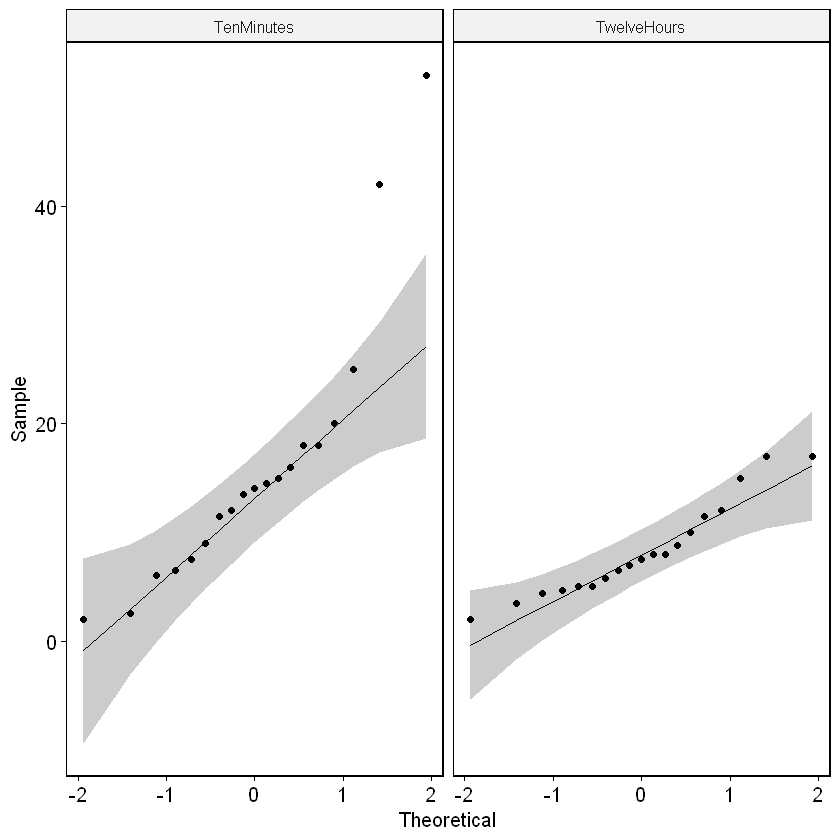

In [296]:
ggqqplot(Stress_long, "Level", facet.by = "Measure")

In [297]:
Stress_long %>% levene_test(Level~Measure)

Warning message in leveneTest.default(y = y, group = group, ...):
"group coerced to factor."


df1,df2,statistic,p
<int>,<int>,<dbl>,<dbl>
1,36,3.814655,0.05861313


In [298]:
Stress_long %>% wilcox_test(Level ~ Measure, paired = TRUE)

,.y.,group1,group2,n1,n2,statistic,p
,<chr>,<chr>,<chr>,<int>,<int>,<dbl>,<dbl>
1,Level,TenMinutes,TwelveHours,19,19,131,0.0106


#### P value is less than 0.05 predetermined alpha, so different stressful situation can cause different levels of Beta Endorphin in patients, which means project's alternative hypothasis is not equal to zero, and is meaningful.

In [300]:
Stress_long %>% wilcox_effsize(Level~Measure, paired = TRUE)

,.y.,group1,group2,effsize,n1,n2,magnitude
,<chr>,<chr>,<chr>,<dbl>,<int>,<int>,<ord>
1,Level,TenMinutes,TwelveHours,0.5684129,19,19,large


#### Answer: The effect size calculated is LARGE, so there is not only significant relationship between stress and Beta Endorphin levels, but also the effect is large in reality.

## 6. Assume that the mean and the standard deviation of the difference scores would remain the same if we added more subjects. How many subjects would we need to obtain a t that is significant at alpha=0.01 (two-tailed)? (The difference was significant at alpha=0.05, but not at alpha=0.01.)

In [66]:
diff_scores = Stress_Endo$TwelveHours - Stress_Endo$TenMinutes
mean_diff = mean(diff_scores)
sd_diff = sd(diff_scores)

In [67]:
alpha = 0.01

In [68]:
effectsizenotlong = endobetastress %>% wilcox_effsize(level~measure, paired = TRUE)

In [69]:
effect_size = abs(mean_diff) / sd_diff

In [70]:
effect_size

[1] 0.5695619

In [72]:
pwr.t.test(d = effect_size, sig.level = alpha, p = 0.8, type = "paired", alternative = "two.sided")$n

[1] 39.35824

## Answer: 
#### Apparently adding one or two more to each group of the data would create a lower p value and make it possible to have significance when alpha is 0.01.

## 7. Modify the data by shifting the entries in the “12-hour” column so as to increase the relationship between the two variables. Run a   test on the modified data and notice the effect ont..)

In [125]:
modified_data = read_excel("C://Users//Saeed//Desktop//Amar//Statistics-in-cognitive-rehabilitation-and-cognitive-linguistics-main//pr21rev.xlsx")

In [129]:
modified_data %>% wilcox_test(level~measure, paired = TRUE)

,.y.,group1,group2,n1,n2,statistic,p
,<chr>,<chr>,<chr>,<int>,<int>,<dbl>,<dbl>
1,level,thbefore,tmbefore,19,19,8,0.00128


# Answer
#### By manipulating the data, the p value of our hypo test decreased, so significace is increased but only virtually, which is absolutely wrong.

## 8. Using your answer to the previous part and your knowledge of correlation, how would you expect the degree of correlation between two variables (data sets) to affect the magnitude of the t test between them?

# Answer:
#### I would guess that, the greater the correlation number between variables is, the greater the variables change together, so i would argue that degree of correlation between two sets of variables is not a valid way to discuss the changes that would occur, only the greatness of the changes is what we have in mind.

# Part B.
The Thematic Apperception Test (TAT) presents participants with ambiguous pictures and asks them to tell a story about them. These stories can be scored in any number of ways. Three researchers asked mothers of 20 normal and 20 schizophrenic children to complete the TAT and then scored for the number of stories (out of 10) that exhibited a positive parent–child relationship. The data follow (https://github.com/amanirad/Statistics-in-cognitive-rehabilitation-and-cognitive-linguistics):

<img src="p3.png" width="400"/>

- What would you assume to be the experimental hypothesis behind this study?
- What would you conclude with respect to that hypothesis?
- Why might it be smart to look at the variances of the two groups?
- A significant difference might lead someone to suggest that poor parent–child relationships are the cause of schizophrenia. Why might this be a troublesome conclusion?
- Calculate the 95% confidence limits on mean1-mean2 for the data. Calculate Cohen’s d^.

In [5]:
library(rstatix)
library(ggpubr)

In [1]:
schizo = read.table("C://Users//Saeed//Desktop//Amar//Statistics-in-cognitive-rehabilitation-and-cognitive-linguistics-main//project_2_B.dat", header = TRUE)

In [20]:
schizo

GROUP,NUMBER
<chr>,<int>
NORMAL,8
NORMAL,4
NORMAL,6
NORMAL,3
NORMAL,1
NORMAL,4
NORMAL,4
NORMAL,6
NORMAL,4


In [6]:
schizo = schizo %>% mutate (GROUP = ifelse (GROUP == "1", "NORMAL", "SCHIZO" ))

## 1. What would you assume to be the experimental hypothesis behind this study?
# Answer:
#### Researchers are trying to see if diagnosis of schizophrenia has any effect on parent-child relationship. 
#### Null hypo: H0: mu(normal) = mu(schizo), Alternative hypo: H1: mu(normal) != mu(schizo)

## 2. What would you conclude with respect to that hypothesis?

In [8]:
schizo %>% group_by(GROUP) %>% get_summary_stats(NUMBER)

GROUP,variable,n,min,max,median,q1,q3,iqr,mad,mean,sd,se,ci
<chr>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
NORMAL,NUMBER,20,1,8,3.5,2,4,2,1.483,3.55,1.877,0.420,0.879
SCHIZO,NUMBER,20,0,7,2.0,1,3,2,1.483,2.10,1.553,0.347,0.727


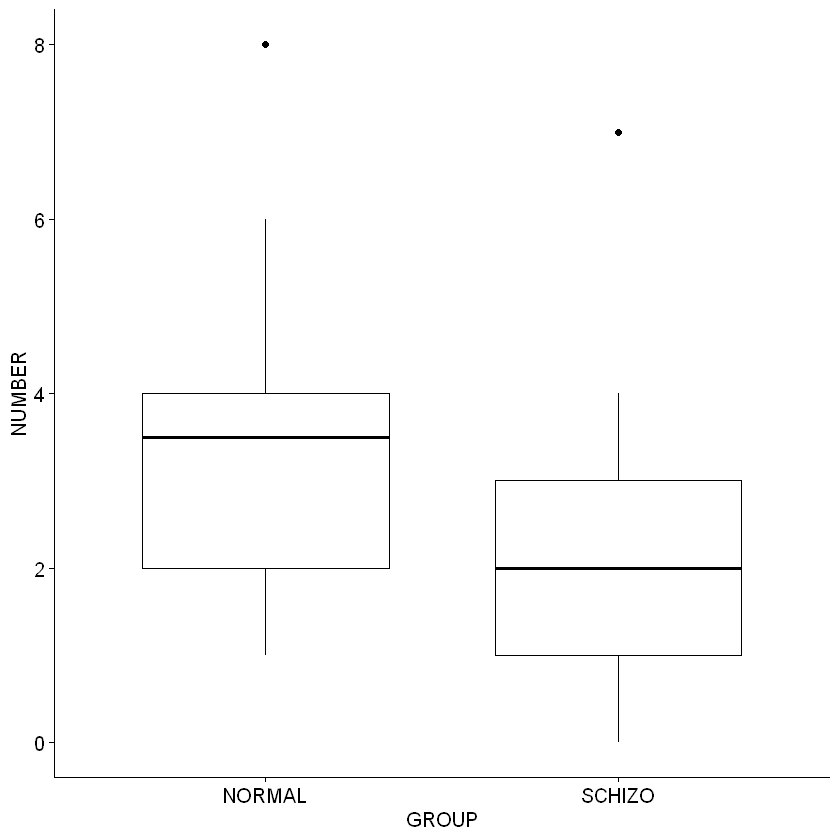

In [9]:
ggboxplot(data = schizo, x = "GROUP", y = "NUMBER")

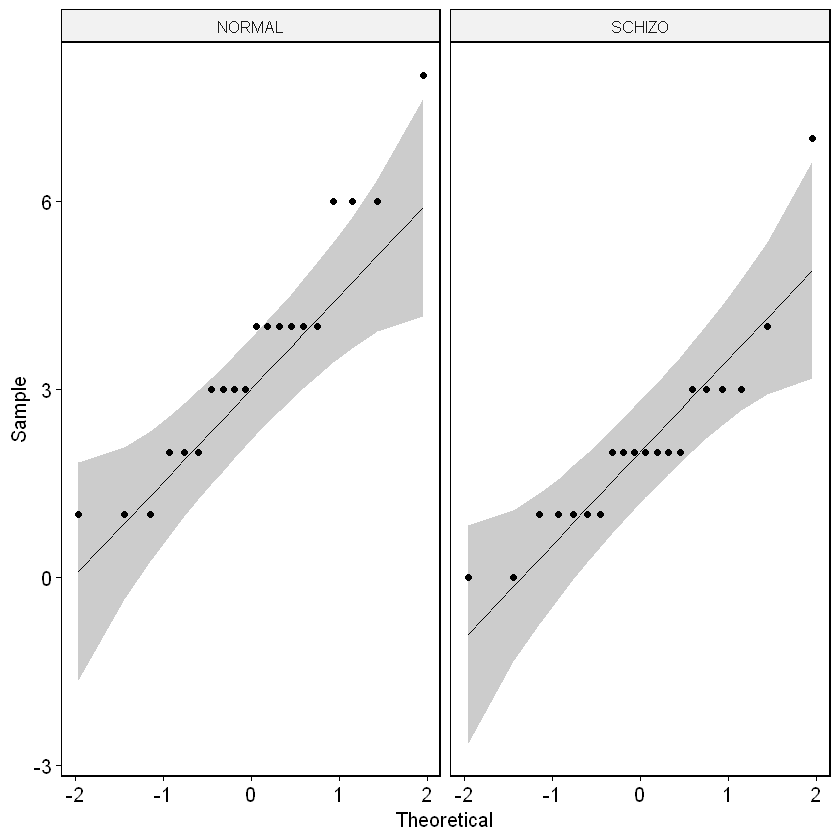

In [153]:
ggqqplot(schizo, "NUMBER", facet.by = "GROUP")

In [10]:
schizo %>% group_by(GROUP) %>% shapiro_test(NUMBER)

GROUP,variable,statistic,p
<chr>,<chr>,<dbl>,<dbl>
NORMAL,NUMBER,0.9245045,0.121003170
SCHIZO,NUMBER,0.8486413,0.005058476


In [35]:
schizo %>% levene_test(NUMBER ~ GROUP)

Warning message in leveneTest.default(y = y, group = group, ...):
"group coerced to factor."


df1,df2,statistic,p
<int>,<int>,<dbl>,<dbl>
1,38,1.510304,0.2266489


#### I tried deleting the outlier data in schizo group, since schizo group is the one that is not normally distributed according to shapiro test, by deleting it the data becomes normal, but oddly, data deletion destroys homeogenity of variances as the result of levene test indicates, so no matter what we do, we have to use non parametric hypo tests.

In [82]:
schizo %>% wilcox_test(NUMBER~GROUP)

,.y.,group1,group2,n1,n2,statistic,p
,<chr>,<chr>,<chr>,<int>,<int>,<dbl>,<dbl>
1,NUMBER,NORMAL,SCHIZO,20,20,297,0.00782


In [83]:
schizo %>% wilcox_effsize(NUMBER~GROUP)

,.y.,group1,group2,effsize,n1,n2,magnitude
,<chr>,<chr>,<chr>,<dbl>,<int>,<int>,<ord>
1,NUMBER,NORMAL,SCHIZO,0.4227547,20,20,moderate


# Answer:
#### Since shapiro test result shows that the data is not normally distributed, I used wilcoxon test to examine the hypothesis, p value is too small and so null hypothesis is not true, and there might be significant relationship between onset of Schizophrenia and parent-child relationship. 
#### also the effect size is moderate so researchers should be careful presenting the results.

## 3. Why might it be smart to look at the variances of the two groups?

In [18]:
schizo %>% levene_test(NUMBER ~ GROUP)

Warning message in leveneTest.default(y = y, group = group, ...):
"group coerced to factor."


df1,df2,statistic,p
<int>,<int>,<dbl>,<dbl>
1,38,1.510304,0.2266489


## Answer:
#### Homogeneity of variances is one of the presuppositions of parametric hypo tests. don't know much more, I'll return for more research if time lets.

## 4. A significant difference might lead someone to suggest that poor parent–child relationships are the cause of schizophrenia. Why might this be a troublesome conclusion?

# Answer:
#### there might be many intermidiating variables that have effect on the hypothesis researchers are looking for, like gender, societal class etc., which non is controlled, and then the N value migh be too small, and even more, the effect size measured is moderate and non-parametric, its not much to look at statistically speaking.

## 5. Calculate the 95% confidence limits on mean1-mean2 for the data. Calculate Cohen’s d^.

In [20]:
t_test_result = t.test(NUMBER ~ GROUP, data = schizo)
t_test_result$conf.int

[1] 0.3460137 2.5539863
attr(,"conf.level")
[1] 0.95

In [86]:
schizo %>% cohens_d(NUMBER~GROUP)

,.y.,group1,group2,effsize,n1,n2,magnitude
,<chr>,<chr>,<chr>,<dbl>,<int>,<int>,<ord>
1,NUMBER,NORMAL,SCHIZO,0.8417857,20,20,large


# Part C. 
- Brescoll and Uhlmann (2008) investigated the hypothesis that when an observer views a videotape of a male expressing anger as opposed to sadness, the male in the anger condition is accorded higher status than the male in the sadness condition. For 19 males the mean and standard deviation (in parentheses) of the anger condition were 6.47 (2.25). For the 29 men in the sad condition the mean and standard deviation were 4.05 (1.61). Is this difference significant?
- They found the reverse effect for females. They thought that perhaps this latter result was related to the way anger is judged in females compared to males. When they compared judgments of a video of a group of 41 females who expressed anger without an attribution for the source of anger, women’s perceived status had a mean and standard deviation of 3.40 (1.44). When the women on the video gave an external attribution for their anger (an employee stole something), their perceived status had a mean and standard deviation of 5.02 (1.66) with a standard deviation of 1.66.
  - Is this difference significant?
  - What is the effect size?
  - The corresponding means and standard deviations (in parentheses) for males were 5.42 (1.63) in the no-attribution condition and 4.14 (2.46) in the external attribution condition. Do we have evidence of a double standard for males and females?

# METHOD A: REPLICATING DATA

# Part A

In [6]:
library(rstatix)
library(ggpubr)

In [1]:
moody_means = c(6.47, 4.05)
moody_sds = c(2.25, 1.61)
moody_ns = c(19, 29)


set.seed(12)
 
simulated_data = lapply(seq_along(moody_means), function(i) {
  rnorm(moody_ns[i], mean = moody_means[i], sd = moody_sds[i])
})


mood_status = data.frame(
  Mood = rep(seq_along(moody_means), times = sapply(simulated_data, length)),
  Status = unlist(simulated_data)
)

In [8]:
mood_status

Mood,Status
<chr>,<dbl>
Angry,3.138723
Angry,10.018631
Angry,4.317325
Angry,4.399988
Angry,1.975305
Angry,5.857334
Angry,5.760465
Angry,5.056426
Angry,6.230456


In [7]:
mood_status = mood_status %>% mutate (Mood = ifelse( Mood == "1", "Angry", "Sad"))

In [9]:
mood_status %>% group_by(Mood) %>% get_summary_stats(Status)

Mood,variable,n,min,max,median,q1,q3,iqr,mad,mean,sd,se,ci
<chr>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Angry,Status,19,1.975,10.019,5.760,4.558,6.867,2.309,2.017,5.720,2.004,0.460,0.966
Sad,Status,29,1.481,7.386,3.729,3.269,4.633,1.364,1.131,3.991,1.381,0.256,0.525


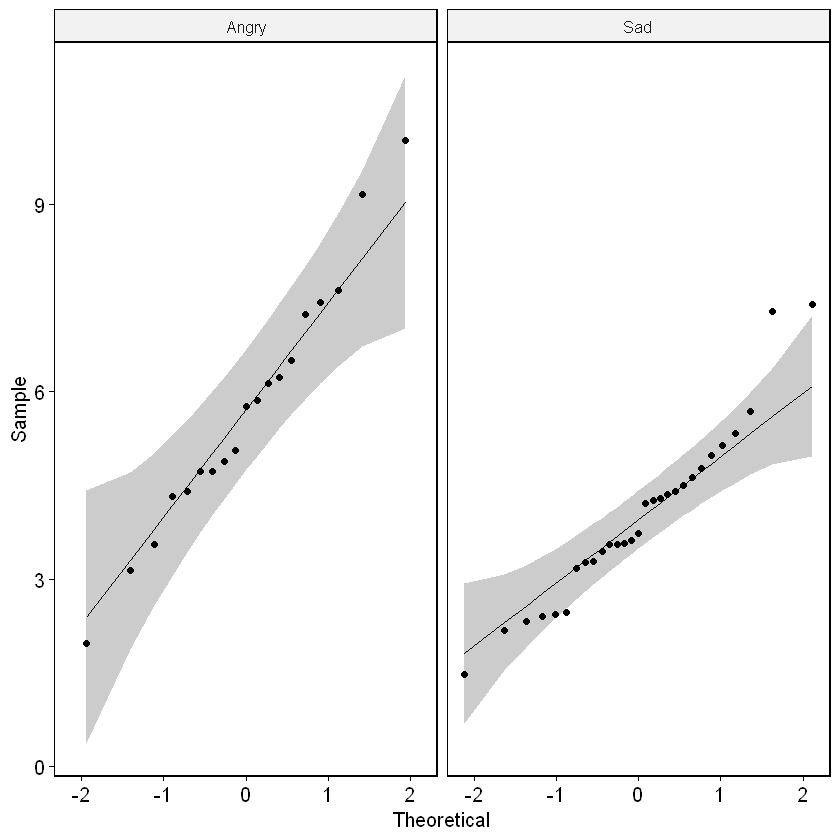

In [11]:
ggqqplot(mood_status, "Status", facet.by = "Mood")

In [10]:
mood_status %>% group_by(Mood) %>% shapiro_test(Status)

Mood,variable,statistic,p
<chr>,<chr>,<dbl>,<dbl>
Angry,Status,0.9810650,0.9539712
Sad,Status,0.9522238,0.2089834


In [126]:
mood_status %>% levene_test(Status~Mood)

Warning message in leveneTest.default(y = y, group = group, ...):
"group coerced to factor."


df1,df2,statistic,p
<int>,<int>,<dbl>,<dbl>
1,46,2.594546,0.1140738


In [13]:
mood_status %>%  t_test(Status~Mood) %>% add_significance

.y.,group1,group2,n1,n2,statistic,df,p,p.signif
<chr>,<chr>,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<chr>
Status,Angry,Sad,19,29,3.284268,29.13231,0.00266,**


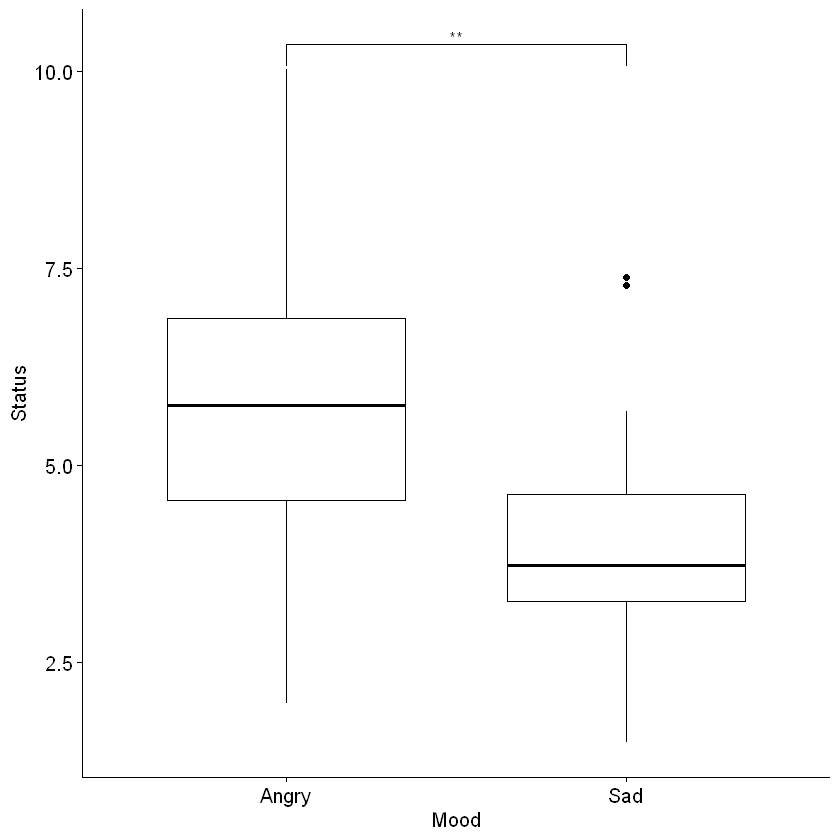

In [16]:
t_value = mood_status %>%  t_test(Status~Mood) %>% add_significance
t_value = t_value %>% add_xy_position(x = "Mood")
boxjing = ggboxplot(mood_status, x = "Mood", y = "Status")
boxjing + stat_pvalue_manual(t_value)

In [50]:
mood_status %>% cohens_d(Status~Mood)

,.y.,group1,group2,effsize,n1,n2,magnitude
,<chr>,<chr>,<chr>,<dbl>,<int>,<int>,<ord>
1,Status,Angry,Sad,1.004656,19,29,large


## Answer:
#### The P value computed by the t test is lower than presupposed alpha, so it is meaningful, null hypothesis is wrong, plus the effect size computed is large too. so the assumption that men accord higher status towards anger condition is true.

# Part B

In [51]:
moody_female_means = c(3.40, 5.02)
moody_female_sds = c(1.44, 1.66)
moody_female_ns = c(41, 41)


set.seed(12)

simulated_data = lapply(seq_along(moody_female_means), function(i) {
  rnorm(moody_female_ns[i], mean = moody_female_means[i], sd = moody_female_sds[i])
})


mood_status_females = data.frame(
  Mood = rep(seq_along(moody_female_means), times = sapply(simulated_data, length)),
  Status = unlist(simulated_data)
)

In [52]:
mood_status_females = mood_status_females %>% mutate (Mood = ifelse( Mood == "1", "Yes_attrib", "No_attrib"))

In [53]:
mood_status_females

Mood,Status
<chr>,<dbl>
Yes_attrib,1.2679827
Yes_attrib,5.6711240
Yes_attrib,2.0222880
Yes_attrib,2.0751924
Yes_attrib,0.5233954
Yes_attrib,3.0078937
Yes_attrib,2.9458979
Yes_attrib,2.4953125
Yes_attrib,3.2466920


In [118]:
mood_status_females %>% levene_test(Status~Mood)

Warning message in leveneTest.default(y = y, group = group, ...):
"group coerced to factor."


df1,df2,statistic,p
<int>,<int>,<dbl>,<dbl>
1,80,1.507657,0.2230974


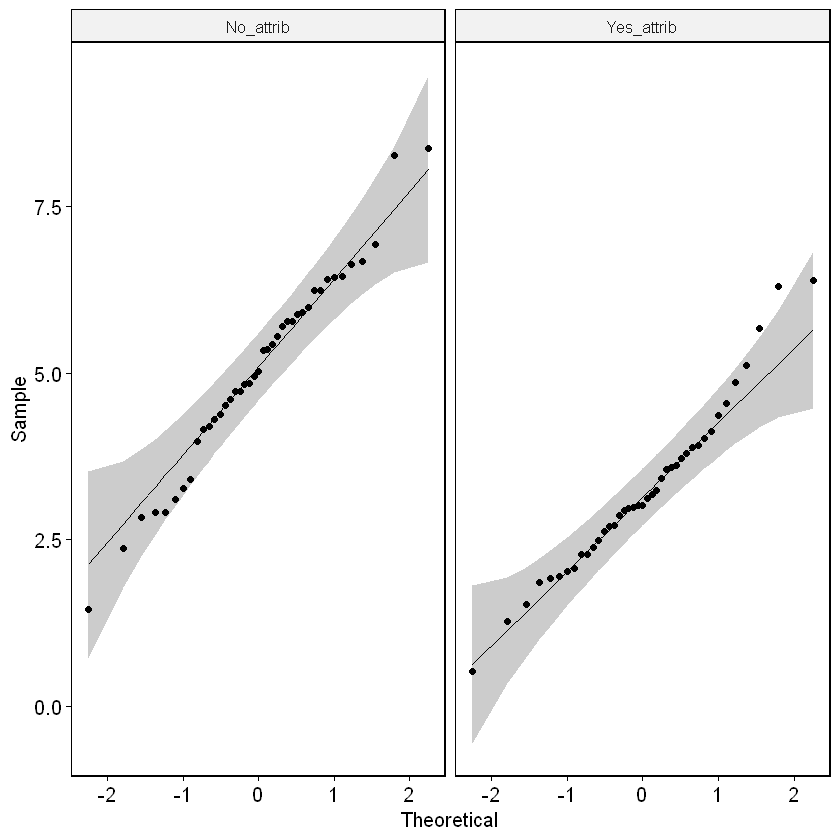

In [55]:
ggqqplot(mood_status_females, "Status", facet.by = "Mood")

In [54]:
mood_status_females %>% group_by(Mood) %>% shapiro_test(Status)

Mood,variable,statistic,p
<chr>,<chr>,<dbl>,<dbl>
No_attrib,Status,0.9833527,0.8000825
Yes_attrib,Status,0.9704185,0.3557898


In [56]:
mood_status_females %>% group_by(Mood) %>% identify_outliers(Status)

Mood,Status,is.outlier,is.extreme
<chr>,<dbl>,<lgl>,<lgl>
No_attrib,1.452228,TRUE,FALSE
Yes_attrib,6.290370,TRUE,FALSE
Yes_attrib,6.383732,TRUE,FALSE


In [57]:
mood_status_females %>% t_test(Status~Mood, paired = TRUE) %>% add_significance

.y.,group1,group2,n1,n2,statistic,df,p,p.signif
<chr>,<chr>,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<chr>
Status,No_attrib,Yes_attrib,41,41,5.849029,40,7.71e-07,****


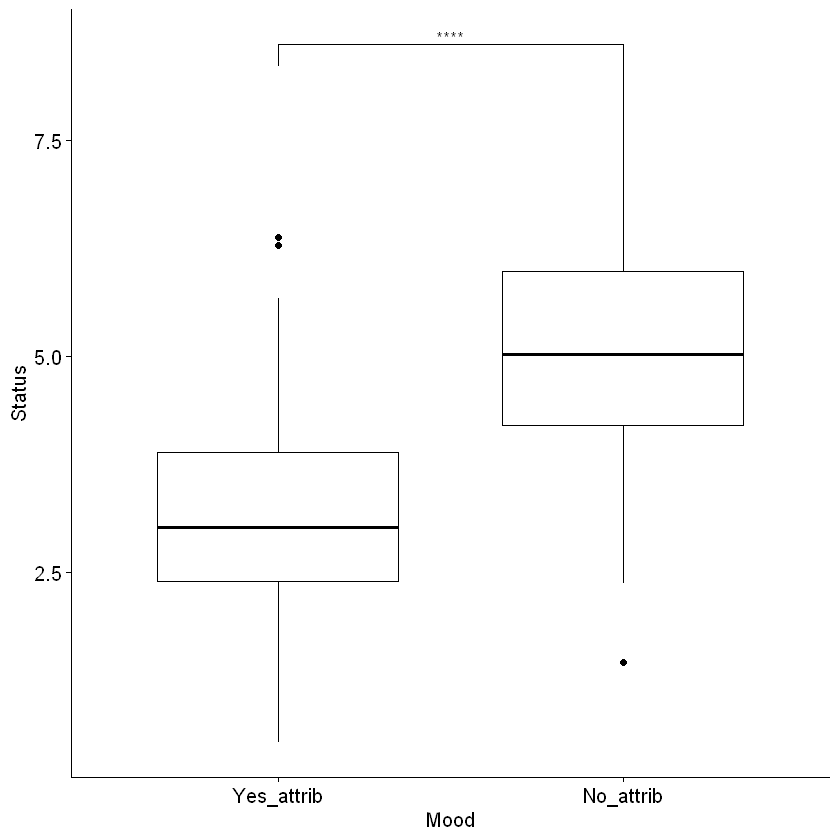

In [58]:
tress1 = mood_status_females %>% t_test(Status~Mood, paired = TRUE) %>% add_significance
ggbox2 = ggboxplot(mood_status_females, x = "Mood", y = "Status")
tress1 = tress1 %>% add_xy_position(x = "Mood")
ggbox2 + stat_pvalue_manual(tress1)

In [112]:
mood_status_females %>% cohens_d(Status~Mood)

,.y.,group1,group2,effsize,n1,n2,magnitude
,<chr>,<chr>,<chr>,<dbl>,<int>,<int>,<ord>
1,Status,No_attrib,Yes_attrib,1.293317,41,41,large


## Answer:
### They might be right, since t test results low p value, plus the effect size is large, women might indeed judge the anger emotion on accordance to the attribution towards it.

# Part C

### Here I changed my method, instead I computed the differences of the male and female with and without attributions and then compared them as two independent sets of data. seemed to be easier.

In [62]:
male_attrib_means = c(5.42, 4.14)
male_attrib_sds = c(1.63, 2.46)
ns_male = c(48, 48)

female_attrib_means = c(5.02, 3.40)
female_attrib_sds = c(1.44, 1.66)
ns_female = c(41, 41)

In [63]:
male_diff = male_attrib_means[1] - male_attrib_means[2]
female_diff = female_attrib_means[1] - female_attrib_means[2]
male_diff
female_diff

[1] 1.28

[1] 1.62

In [64]:
t.test(c(male_diff, female_diff))


	One Sample t-test

data:  c(male_diff, female_diff)
t = 8.5294, df = 1, p-value = 0.0743
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 -0.7100548  3.6100548
sample estimates:
mean of x 
     1.45 


## Answer:
#### In male group with and without attribution, as the t test result indicates, angry men with no attribution towards their mood are indeed considered to have higher status, so Yes, researchers do have a double standard here.

# METHOD B: MANUAL CALCULATION

### A: Comparison of two group of men with saddness and anger emotional judgement towards status of same gender.

In [22]:
mean_anger_condition = 6.47
mean_sad_condition = 4.05
sd_anger_condition = 2.25
sd_sad_condition = 1.61
number_anger_condition = 19
number_sad_condition = 29

In [23]:
t_comp = (mean_anger_condition - mean_sad_condition) / sqrt((sd_anger_condition^2 / number_anger_condition) + (sd_sad_condition^2 / number_sad_condition))
t_comp

[1] 4.056897

In [67]:
degree_of_freedom = (29+19) - 2
degree_of_freedom

[1] 46

In [68]:
p_value = 2 * pt(abs(t_comp), degree_of_freedom, lower.tail = FALSE)

p_value

[1] 0.0001906215

## B: Comparison of females status judgement with and without attribution towards anger emotion.

In [27]:
mean_without_attribution = 3.40
mean_with_attribution = 5.02
sd_without_attribution = 1.44
sd_with_attribution = 1.66
n = 41

In [28]:
pooled_sd = sqrt(((sd_without_attribution^2) + (sd_with_attribution^2)) / 2)

In [29]:
t_comp2 = (mean_with_attribution - mean_without_attribution) / (pooled_sd / sqrt(n))
t_comp2

[1] 6.675508

In [30]:
degree_of_freedom2 = n - 1

In [31]:
p_value2 = 2 * pt(abs(t_comp2), degree_of_freedom2, lower.tail = FALSE)
p_value2

[1] 5.322315e-08

In [32]:
meandiff = mean_with_attribution - mean_without_attribution

In [33]:
Cohens_D = meandiff/pooled_sd
Cohens_D

[1] 1.042539

#### Answer: The t test result shows that there is significant difference between with and without attribution towards anger emotion in females. but the effect size computed using Cohen's D is showing small magnitude of effectsize, so the resutls might not be much to look at.

## C: Comparison of attribution's role on status judgement in anger emotion in males.

In [40]:
corresponding_male_mean1 = 5.42
corresponding_female_mean2 = 4.14
corresponding_male_sd1 = 1.63
corresponding_female_sd2 = 2.46
n_male = 48
n_female = 41

In [41]:
t_comp3 = (corresponding_mean1 - corresponding_mean2) / sqrt((corresponding_sd1^2 / n) + (corresponding_sd2^2 / n))

In [42]:
degree_of_freedom3 = n -1

In [43]:
p_value3 = 2 * pt(abs(t_comp3), degree_of_freedom3, lower.tail = FALSE)
p_value3

[1] 0.004249107

In [44]:
meandiff2 = corresponding_mean1 - corresponding_mean2

In [45]:
pooled_sd2 = sqrt(((corresponding_sd2^2) + (corresponding_sd1^2)) / 2)

In [46]:
Cohens_D2 = meandiff2/pooled_sd2
Cohens_D2

[1] 0.6134134

## Answer:
#### Here also t test result shows significant difference between male status judgement towards anger emotion, with and without attribution provided, but the resutls is in contrast with female's judgement, so yes, we have a double standard here.

# Part D. 
- Two researchers reported on an intervention program for women with abusive partners. The study involved a 10-week intervention program and a three-year follow-up, and used an experimental (intervention) and control group. At the end of the 10-week intervention period the mean quality-of-life score for the intervention group was 5.03 with a standard deviation of 1.01 and a sample size of 135. For the control group the mean was 4.61 with a standard deviation of 1.13 and a sample size of 130. Do these data indicate that the intervention was successful in terms of the quality-of-life measure?
- Calculate a confidence interval for the difference in group means. Then calculate a d-family measure of effect size for that difference.
- Another way to investigate the effectiveness of the intervention described above would be to note that the mean quality-of-life score before the intervention was 4.47 with a standard deviation of 1.18. The quality-of-life score was 5.03 after the intervention with a standard deviation of 1.01. The sample size was 135 at each time. What do these data tell you about the effect of the intervention? (Note: You don’t have the difference scores, but assume that the standard deviation of difference scores was 1.30.)
- For the control condition of the experiment the beginning and 10-week means were 4.32 and 4.61 with standard deviations of 0.98 and 1.13, respectively. The sample size was 130. Using the data from this group and the intervention group, plot the change in pre- to post-test scores for the two groups and interpret what you see. (If you wish the information, the standard deviation of the difference was 1.25.)

# METHOD A: REPLICATING DATA

In [28]:
library(rstatix)
library(ggpubr)
library(tidyverse)

In [18]:
after_intervention_control_mean = c(5.03, 4.61)
after_intervention_control_sd = c(1.01, 1.13)
n_intervention_control = c(135, 130)


set.seed(12)

simulated_data = lapply(seq_along(after_intervention_control_mean), function(i) {
  rnorm(n_intervention_control[i], mean = after_intervention_control_mean[i], sd = after_intervention_control_sd[i])
})


abusive_data = data.frame(
  Group = rep(seq_along(after_intervention_control_mean), times = sapply(simulated_data, length)),
  QOL = unlist(simulated_data)
)

In [22]:
abusive_data

Group,QOL
<chr>,<dbl>
Intervention,3.534627
Intervention,6.622941
Intervention,4.063688
Intervention,4.100795
Intervention,3.012381
Intervention,4.754981
Intervention,4.711498
Intervention,4.395462
Intervention,4.922471


In [21]:
abusive_data = abusive_data%>% mutate (Group = ifelse(Group == "1", "Intervention", "Control"))

In [23]:
abusive_data %>% t_test(QOL~Group)

,.y.,group1,group2,n1,n2,statistic,df,p
,<chr>,<chr>,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>
1,QOL,Control,Intervention,130,135,-3.789022,251.4577,0.000189


In [24]:
abusive_data %>% cohens_d(QOL~Group)

,.y.,group1,group2,effsize,n1,n2,magnitude
,<chr>,<chr>,<chr>,<dbl>,<int>,<int>,<ord>
1,QOL,Control,Intervention,-0.4663752,130,135,small


In [40]:
t.test(abusive_data$QOL[abusive_data$Group=="Intervention"])$conf.int

[1] 4.880121 5.190036
attr(,"conf.level")
[1] 0.95

In [41]:
t.test(abusive_data$QOL[abusive_data$Group=="Control"])$conf.int

[1] 4.378200 4.756008
attr(,"conf.level")
[1] 0.95

## Answer
#### Since we have two sets of independent data to compare, I computed a independent t test, which low p value indicates that the Intervention was probably a success, but low effect size computed using cohen's d test shows low effect size magnitude which indicates eventhough the mean comparison shows significant difference, yet intervention might not be as effective as imagined.

# Answer:
#### Using t test to calculate the mean difference significance of control and intervention groups, the p value is small so the difference in meaningful and the intervention was probably effective, the confidence interval is also calculated which is 0.083_0.58 as the t test reports, the conhen's d was calculated manually, which reports 0.32, which is low in terms of Cohen's d.

## Part Two
## Comparison of before and after intervention in the intervention group.

In [29]:
intervention_mean = c(4.47, 5.03)
intervention_sd = c(1.18, 1.01)
n_intervention = c(135,135)

set.seed(14)
 
simulated_data2 = lapply(seq_along(intervention_mean), function(i) {
  rnorm(n_intervention[i], mean = intervention_mean[i], sd = intervention_sd[i])
})


intervention_before_after = data.frame(
  Group = rep(seq_along(intervention_mean), times = sapply(simulated_data2, length)),
  QOL = unlist(simulated_data2)
)

In [32]:
intervention_before_after

Group,QOL
<chr>,<dbl>
Before_Int,3.689017
Before_Int,6.498366
Before_Int,6.973567
Before_Int,6.236641
Before_Int,4.427354
Before_Int,5.923695
Before_Int,4.393441
Before_Int,5.731413
Before_Int,4.025181


In [31]:
intervention_before_after = intervention_before_after%>% mutate (Group = ifelse(Group == "1", "Before_Int", "After_Int"))

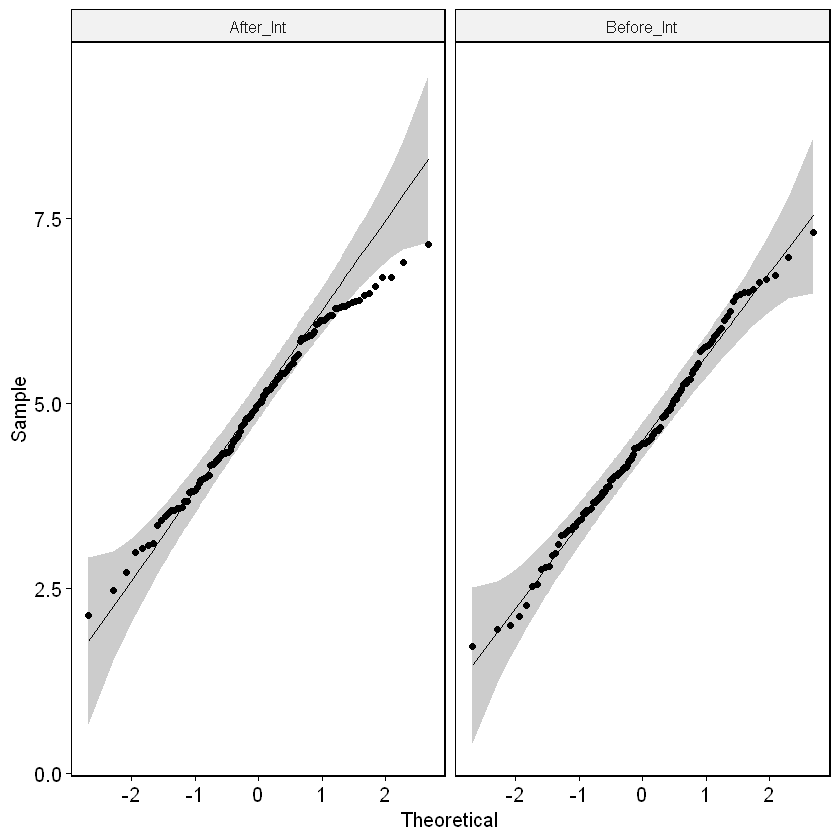

In [34]:
ggqqplot(intervention_before_after, "QOL", facet.by = "Group")

In [35]:
intervention_before_after %>% group_by(Group) %>% shapiro_test(QOL)

Group,variable,statistic,p
<chr>,<chr>,<dbl>,<dbl>
After_Int,QOL,0.9861024,0.1892646
Before_Int,QOL,0.9920296,0.6453702


In [37]:
intervention_before_after %>% levene_test(QOL~Group)

Warning message in leveneTest.default(y = y, group = group, ...):
"group coerced to factor."


df1,df2,statistic,p
<int>,<int>,<dbl>,<dbl>
1,268,0.369582,0.543747


In [38]:
intervention_before_after %>% group_by(Group) %>% identify_outliers(QOL)

Group,QOL,is.outlier,is.extreme
<chr>,<dbl>,<lgl>,<lgl>


In [33]:
intervention_before_after %>% t_test(QOL~Group)

,.y.,group1,group2,n1,n2,statistic,df,p
,<chr>,<chr>,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>
1,QOL,After_Int,Before_Int,135,135,3.264349,265.2921,0.00124


In [39]:
intervention_before_after %>% cohens_d(QOL~Group)

,.y.,group1,group2,effsize,n1,n2,magnitude
,<chr>,<chr>,<chr>,<dbl>,<int>,<int>,<ord>
1,QOL,After_Int,Before_Int,0.3973239,135,135,small


## Answer:
#### Here you can see that the before and after intervention mean comparison is meaningful as reported by the t test, but the cohen's d value is too little, so reporting the results researchers must be careful.

# PART 3 : plotting the differences

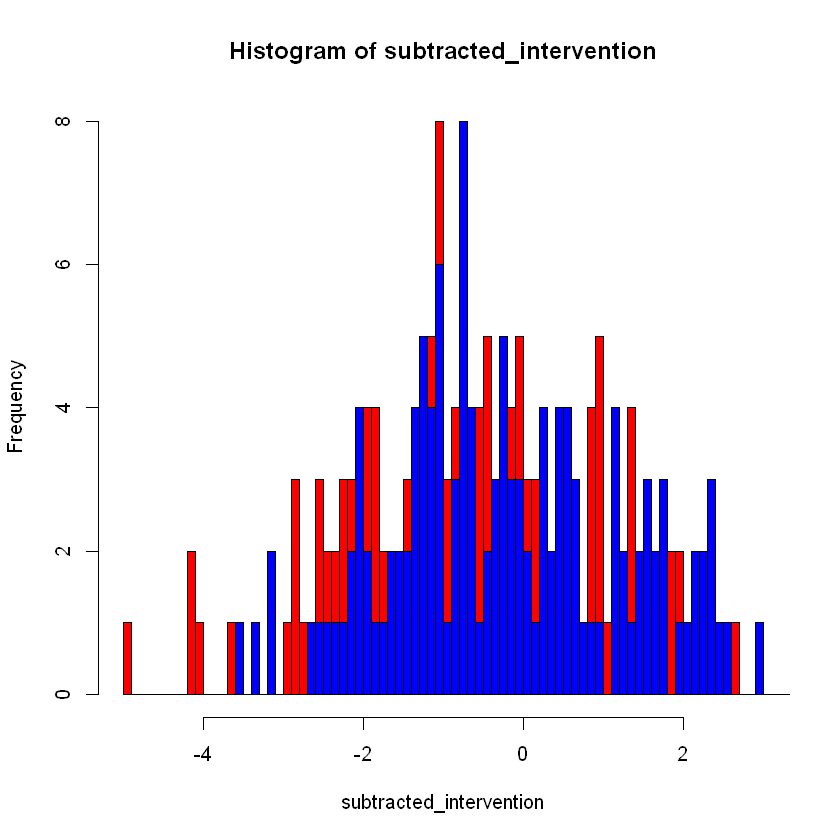

In [101]:
hist(subtracted_intervention, col = "Red", breaks = 100)
hist(subtracted_control, col = "Blue", add = TRUE, breaks = 100)

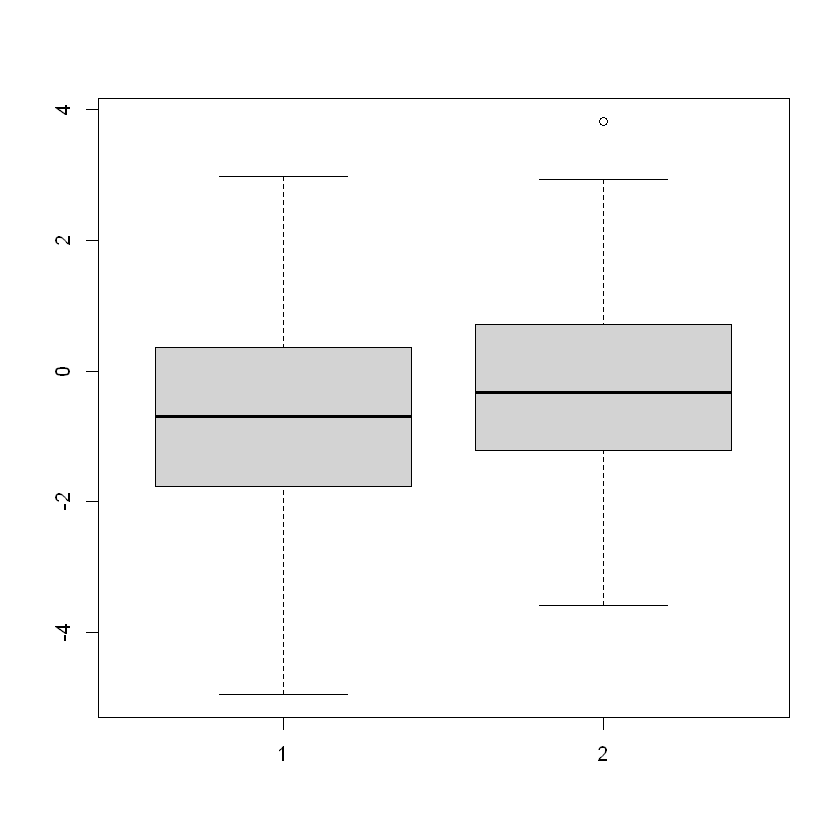

In [108]:
boxplot(subtracted_intervention, subtracted_control)

## Answer:
#### T test from difference of intervention and control group, both from before and after intervention is low so the null hypothesis is not true and researchers can report that the intervention did make difference, the hitogram shows the same resutls and as its observable, the intervention group has higher stats.

# METHOD B: MANUAL CALCULATION

In [6]:
mean_intervention = 5.03
mean_control = 4.61
sd_control = 1.13
sd_intervention = 1.01
n_intervention = 135
n_control = 130

In [7]:
t_score = (mean_intervention - mean_control )/sqrt((sd_intervention^2/n_intervention) + (sd_control^2/n_control))
t_score

[1] 3.185971

In [8]:
degree_of_freedom = n_intervention + n_control - 2
degree_of_freedom

[1] 263

In [9]:
p_val = 2 * pt(abs(t_score), degree_of_freedom, lower.tail = FALSE)
p_val

[1] 0.001616748

In [10]:
upper_confidence_interval = (mean_intervention - mean_control) + (1.960*sqrt((sd_intervention/n_intervention)+(sd_control/n_control)))
upper_confidence_interval

[1] 0.6692654

In [11]:
lower_confidence_interval = (mean_intervention - mean_control) - (1.960*sqrt((sd_intervention/n_intervention)+(sd_control/n_control)))
lower_confidence_interval

[1] 0.1707346

In [12]:
cohens_d = (mean_intervention - mean_control) / sqrt(((sd_intervention^2) + (sd_control^2)) / 2)
cohens_d

[1] 0.3919077

#### the p value calculated is lower than 0.05 alpha, so there is significant difference between the intervention and control group, which means that the intervention was a success. The effect size calculated is at the medium range so its fair to say its ok to report the success of intervention.

## Part 2 of question:

In [1]:
mean_before = 4.47
sd_before = 1.18
mean_after = 5.03
sd_after = 1.01
sd_difference = 1.30
sample_size = 135

In [2]:
se_difference = sd_difference / sqrt(sample_size)

In [3]:
t_stat = (mean_before - mean_after) / se_difference
df = sample_size - 1

In [4]:
p_value = 2 * pt(abs(t_stat), df = df, lower.tail = FALSE)
p_value

[1] 1.723291e-06

In [5]:
cohen_d = (mean_before - mean_after) / sd_difference
cohen_d

[1] -0.4307692

### The pre and post intervention comparison also shows that the intervention was a success, and the effect size calculated is still in the medium range.